In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

np.random.seed(555)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
user_features = pd.read_csv('user-features.csv')
item_features = pd.read_csv('item-features.csv')

#  features

In [5]:
user_features.set_index('user_id', inplace=True)
item_features.set_index('item_id', inplace=True)

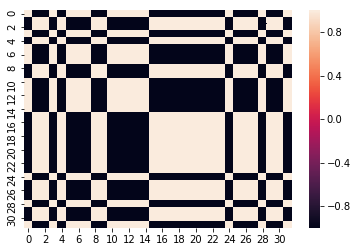

In [6]:
sns.heatmap(user_features.corr())

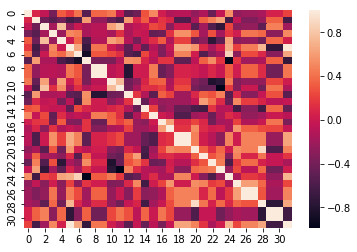

In [7]:
sns.heatmap(item_features.corr())

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca.fit(item_features.values)
pca.explained_variance_ratio_.cumsum()

array([0.38584675, 0.60198545, 0.73288149, 0.80900286, 0.87650087,
       0.92317195, 0.95056808, 0.97193468, 0.98592696, 0.99606962,
       0.99977595, 0.99994347, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [12]:
user_features = user_features.loc[:, user_features.columns[0]]
item_features = item_features.loc[:, item_features.columns[:10]]

# Baseline 


In [12]:
train[]

,user_id,item_id,like,timestamp
0,140,342,0,1490936622
1,378,172,1,1490936628
2,150,182,0,1490936650
3,455,17,0,1490936704
4,350,409,0,1490936735
...,...,...,...,...
8669,161,312,0,1491215519
8670,406,208,0,1491215543
8671,196,43,0,1491215576
8672,84,100,0,1491215579


In [28]:
test

,user_id,timestamp
0,166,1490944431
1,26,1490957371
2,41,1490958147
3,286,1490971255
4,108,1490976836
...,...,...
492,190,1491214814
493,181,1491214829
494,448,1491214928
495,124,1491215197


In [5]:
item_id_likes = train.groupby('item_id').sum().reset_index()[['item_id', 'like']]
item_id_likes['like'] *= -1
item_id_likes.sort_values(by=['like'], inplace=True)

In [6]:
top_items = item_id_likes.item_id.values

In [39]:
results = []
for user in tqdm(test.user_id.values):
    df = train[train.user_id == user]
    items_user_dont_like = df[df.like == 0].item_id.values
    df = df[df.timestamp < list(test[test.user_id == user].timestamp)[0]]
    items_user_like = df[df.like == 1].item_id.values
    
    df = train[train.user_id == user]
    df = df[df.timestamp > list(test[test.user_id == user].timestamp)[0]]
    items = []df[df.like == 1].item_id.values
    i = 0
    answer = [i for i in items]
    while len(answer) != 20:
        if top_items[i] in items_user_like or top_items[i] in items_user_dont_like:
            i += 1
        else:
            answer.append(top_items[i])
            i += 1

    results.append([user] + answer)

100%|██████████| 497/497 [00:01<00:00, 289.55it/s]


In [33]:
pd.DataFrame(results, columns=['user_id'] + [str(i) for i in range(20)]).to_csv('baseline.csv', index=False)

In [34]:
results

[[166,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [26,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44],
 [41,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  146,
  5,
  87,
  44,
  78],
 [286,
  76,
  22,
  35,
  72,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [108,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [479,
  76,
  22,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [483,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [355,
  76,
  22,
  35,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87

[[166,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [26,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44],
 [41,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  146,
  5,
  87,
  44,
  78],
 [286,
  76,
  22,
  35,
  72,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [108,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [479,
  76,
  22,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [483,
  76,
  22,
  35,
  72,
  40,
  37,
  80,
  58,
  65,
  66,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87,
  44,
  78],
 [355,
  76,
  22,
  35,
  40,
  37,
  80,
  58,
  65,
  66,
  11,
  60,
  32,
  67,
  21,
  7,
  146,
  5,
  87